In [34]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:

## Reading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
## Checking the head of the data
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [37]:
## Checking the column names in the dataframe
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [38]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in train.columns if train[feature].dtypes == 'O']
num_cols = [feature for feature in train.columns if feature not in cat_cols]

In [39]:
## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [40]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 12
Unique values: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan'

In [41]:

## Removing unnecessary columns
## Removing ID column since it doesn't provide any logical relation to the occurance of the disease
## Removing the age_desc column since it has only one value. In other words, the column has zero variance
train.drop(columns=['ID','age_desc'],axis=1,inplace=True)

In [42]:
## Checking the successful dropping of ID and age_desc columns
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [43]:
## Some of the columns have ? symbol instead of the record
## Here we will just add such records into the Others category
## Columns -- ethnicity, relation
train['ethnicity'] = np.where(train['ethnicity'] == '?', 'Others',train['ethnicity'])
train['relation'] = np.where(train['relation'] == '?', 'Others', train['relation'])

In [44]:
## Checking for successful replacement of records with ?
for feature in ['ethnicity','relation']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 11
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


relation:
Number of unique values in the relation: 5
Unique values: ['Self' 'Relative' 'Parent' 'Others' 'Health care professional']




In [45]:
## In the feature column ethnicity, there are two types of other columns : 1. Others 2. others
## Let's just merge those records into one category named Others
train['ethnicity']= np.where(train['ethnicity'] == 'others', 'Others', train['ethnicity'])

In [46]:
for feature in ['ethnicity']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']




In [47]:
num_cols.remove('ID')
cat_cols.remove('age_desc')

In [48]:

for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Arge

In [49]:

## Checking for missing values in the dataset
train.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

In [50]:
#it seems there is no missing values


In [51]:

## Checking whether the data is unbalanced or not
train['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [52]:
639/(161+639)

0.79875

In [54]:
#This means that almost 80% of the target values are of single category.

#The dataset seems to be unbalanced

In [55]:
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation']

In [56]:

## Creating a copy of the original dataset before encoding (for visualization)
train_copy = train.copy()

In [57]:

## Since we already have over 15 independent feature, we will use ordinal encoding instead
## of the one-hot encoding on the categorical features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=60, dtype=np.int64)

train[cat_cols] = oe.fit_transform(train[cat_cols])

In [58]:

for feature in cat_cols:
    print(f"Unique values in {feature}:")
    print(f"{train[feature].unique()}\n")

Unique values in gender:
[0 1]

Unique values in ethnicity:
[5 9 4 6 1 2 0 8 7 3]

Unique values in jaundice:
[0 1]

Unique values in austim:
[0 1]

Unique values in contry_of_res:
[ 7 25 54 46 31 53 13 36 15 32 52  6 51 27 21 33 55 19 35  0 39 29  1  9
 43 28  5 48 42 12  8  4 44 20 49 24 23  2 16 22 47 50 40 26  3 30 34 37
 45 18 38 41 17 11 14 10]

Unique values in used_app_before:
[0 1]

Unique values in relation:
[4 3 2 1 0]



In [59]:

train[cat_cols].head()

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
0,0,5,0,0,7,0,4
1,1,5,0,0,25,0,4
2,1,9,0,1,54,0,4
3,0,5,0,0,54,0,4
4,1,5,0,0,46,0,4


In [60]:
## Our training data is ready
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,7,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,25,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,54,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,54,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,46,0,-4.777286,4,0


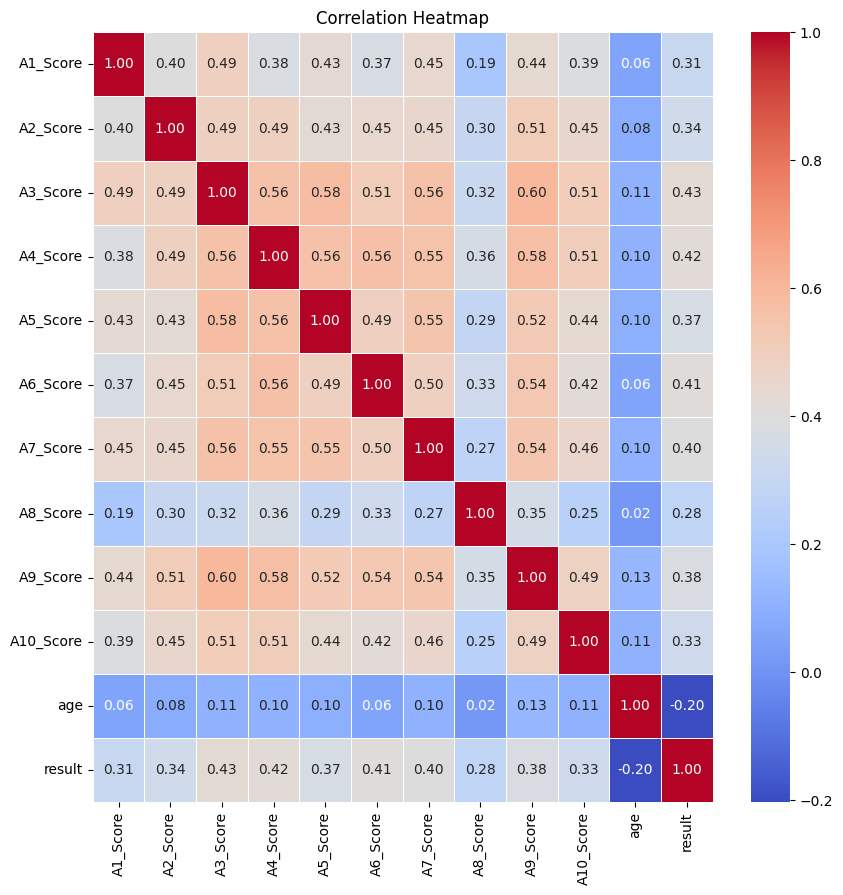

In [61]:
#Data Visualization
# Selecting numerical features for the heatmap
features_hm = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

# Calculate the correlation matrix
correlation_matrix = train[features_hm].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>,
        <Axes: title={'center': 'A4_Score'}>],
       [<Axes: title={'center': 'A5_Score'}>,
        <Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>,
        <Axes: title={'center': 'A8_Score'}>],
       [<Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'ethnicity'}>,
        <Axes: title={'center': 'jaundice'}>,
        <Axes: title={'center': 'austim'}>,
        <Axes: title={'center': 'contry_of_res'}>],
       [<Axes: title={'center': 'used_app_before'}>,
        <Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'relation'}>,
        <Axes: title={'center': 'Class/ASD'}>]], dtype=object)

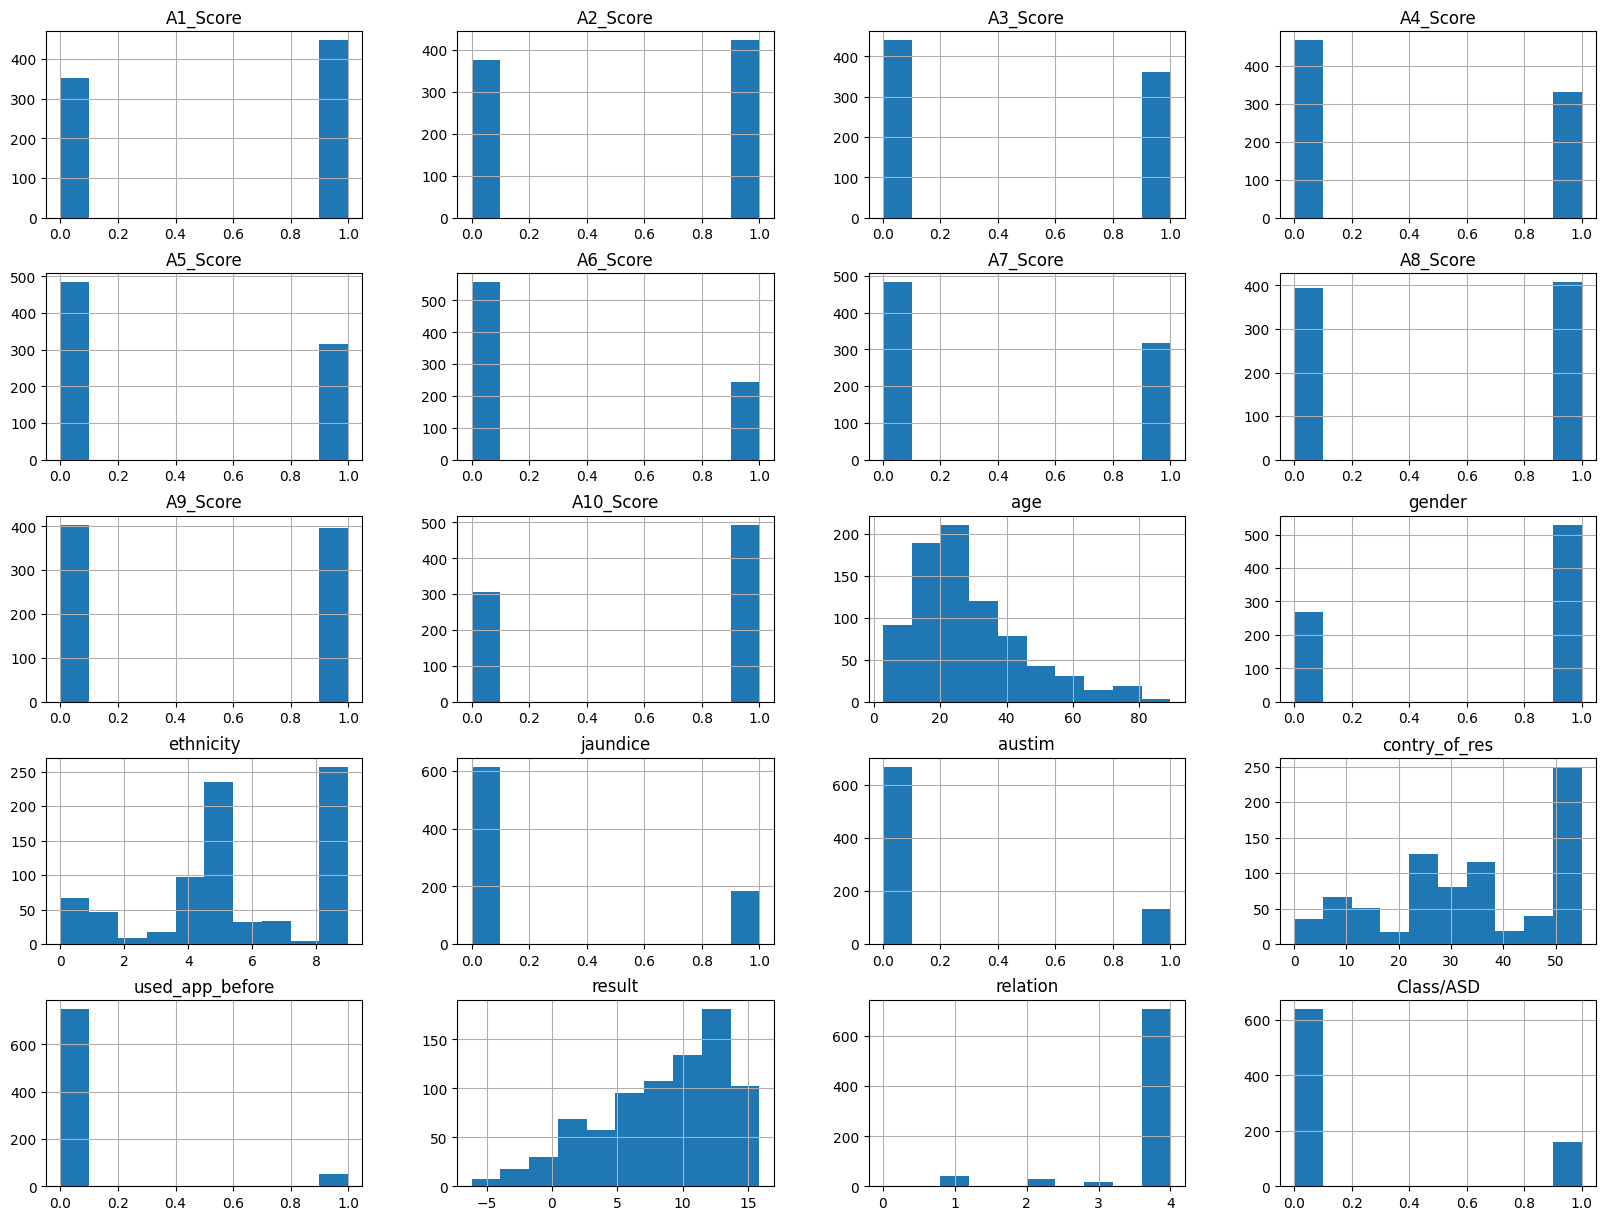

In [62]:
train.hist(figsize=(20,15))


<Axes: ylabel='Density'>

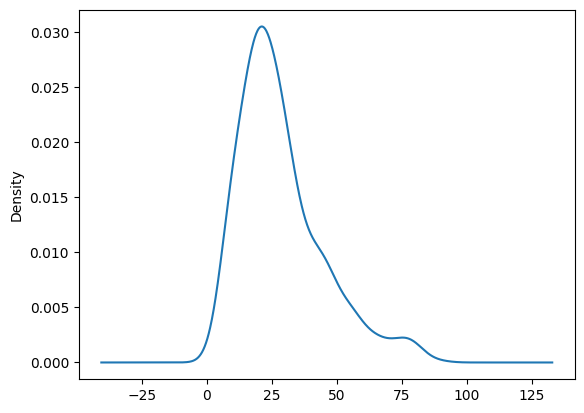

In [63]:

## Plotting the age group
train['age'].plot(kind='kde')

In [64]:

# Filter rows where Class/ASD is 1 (indicating people with autism)
asd_positive = train_copy[train_copy['Class/ASD'] == 1]

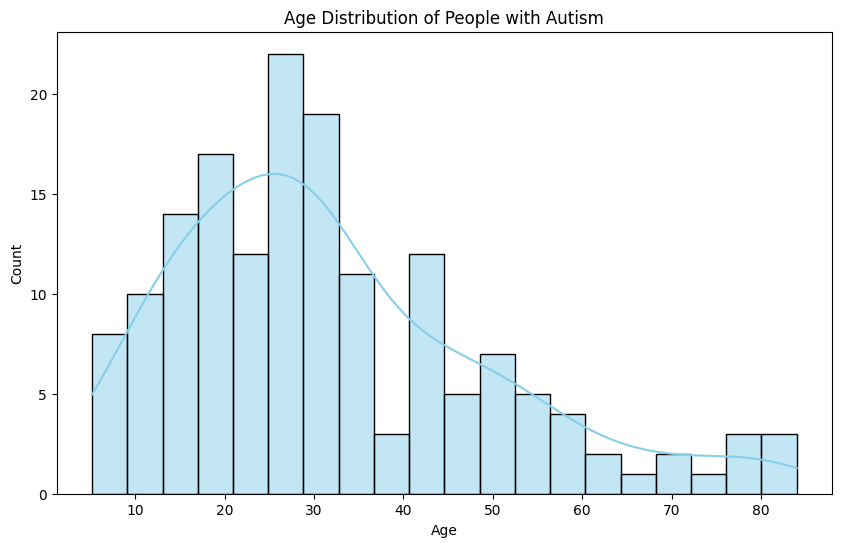

In [65]:
# Plotting age distribution for people with autism
plt.figure(figsize=(10, 6))
sns.histplot(asd_positive['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of People with Autism')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-66-195c0e010f8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=asd_positive, palette='viridis')


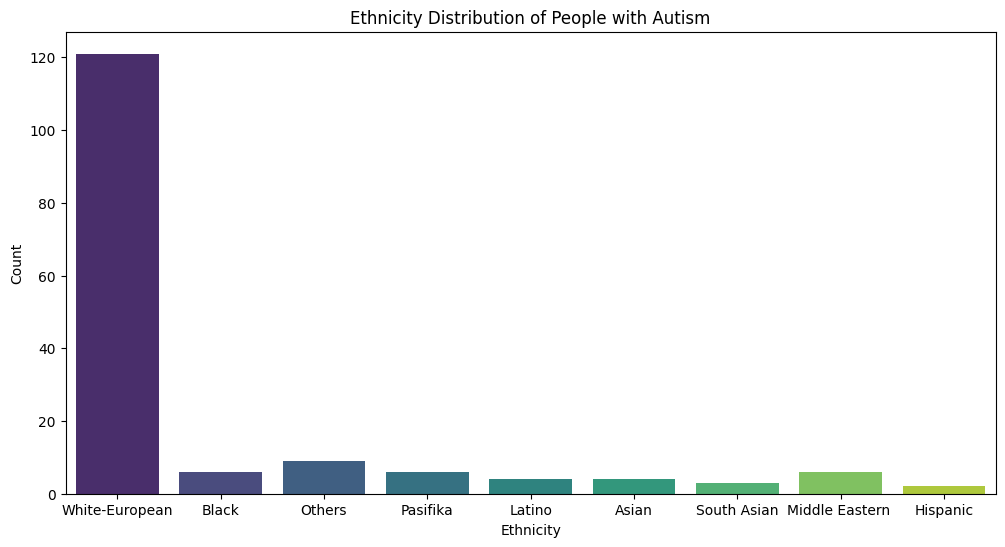

In [66]:

# Plotting ethnicity distribution for people with autism
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', data=asd_positive, palette='viridis')
plt.title('Ethnicity Distribution of People with Autism')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

<ipython-input-67-db3d458cce14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=asd_positive, palette='viridis')


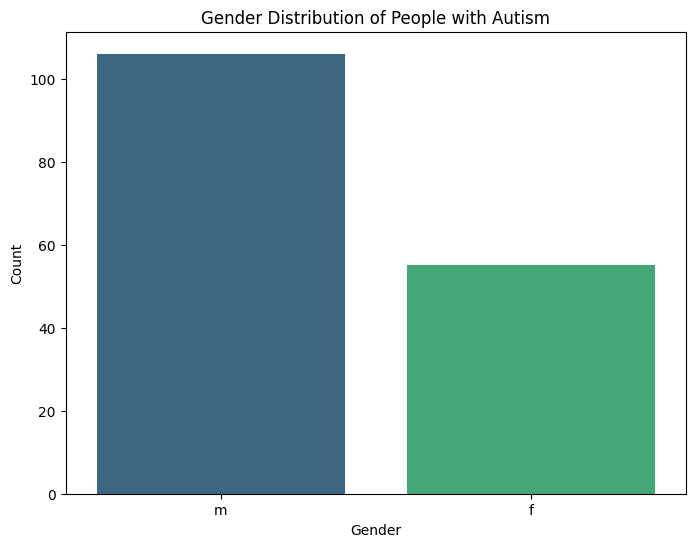

In [67]:

# Plotting gender distribution for people with autism
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=asd_positive, palette='viridis')
plt.title('Gender Distribution of People with Autism')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

MODEL TRAINING


In [68]:
## Splitting the train data into X_train and y_train
X_train = train.drop('Class/ASD', axis=1)
y_train = train['Class/ASD']

In [69]:
## Importing different model classes from the scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

In [70]:
## Importing a method for finding the cross validation score on the training data
from sklearn.model_selection import cross_val_score

In [71]:
## Creating a object for the models
lr = LogisticRegression(random_state=234, max_iter=3000)
svc = SVC(random_state=567,probability=True)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(max_depth=3, n_jobs=-1)
adab = AdaBoostClassifier(n_estimators=100, random_state=32389)
gradb = GradientBoostingClassifier(random_state=34990)
## Finding the cross validation score for every object that was created
model_lst = [lr, svc, knc, rfc, adab, gradb]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=10, scoring = 'roc_auc', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")

Cross validation score for the LogisticRegression(max_iter=3000, random_state=234): 0.905

Cross validation score for the SVC(probability=True, random_state=567): 0.868

Cross validation score for the KNeighborsClassifier(): 0.811

Cross validation score for the RandomForestClassifier(max_depth=3, n_jobs=-1): 0.915

Cross validation score for the AdaBoostClassifier(n_estimators=100, random_state=32389): 0.876

Cross validation score for the GradientBoostingClassifier(random_state=34990): 0.896



In [72]:
from sklearn.metrics import roc_auc_score
import random

vc = VotingClassifier(estimators=
                     [('lr',lr), ('svc', svc), ('rfc', rfc), ('knc', knc)], voting='soft')
vc.fit(X_train, y_train)
vc_scores = vc.predict_proba(X_train)[:,1]
vc_roc_auc_score = np.round(roc_auc_score(y_train, vc_scores),3)
print(f"Cross validation score for the voting classifier: {vc_roc_auc_score}")

Cross validation score for the voting classifier: 0.938


In [73]:
## Trying out another voting classifier
vc2 = VotingClassifier(estimators=
                     [('lr',lr),('rfc', rfc), ('adab',adab), ('gradb', gradb)], voting='soft')
vc2.fit(X_train, y_train)
vc2_scores = vc2.predict_proba(X_train)[:,1]
vc2_roc_auc_score = np.round(roc_auc_score(y_train, vc2_scores),3)
print(f"Cross validation score for the voting classifier: {vc2_roc_auc_score}")

Cross validation score for the voting classifier: 0.965


In [74]:
## Trying out the stacking classifier
estimators = [('vc',vc), ('vc2', vc2)]

sc = StackingClassifier(estimators=estimators, final_estimator=rfc)
sc.fit(X_train, y_train)
sc_score = sc.predict_proba(X_train)[:,1]
sc_roc_auc_score = np.round(roc_auc_score(y_train, sc_score), 3)
print(f"Cross validation score for the stacking classifier: {sc_roc_auc_score}")

Cross validation score for the stacking classifier: 0.951


Voting classifier number 2 seems to be the best model out of all the ones that we trained on the training data

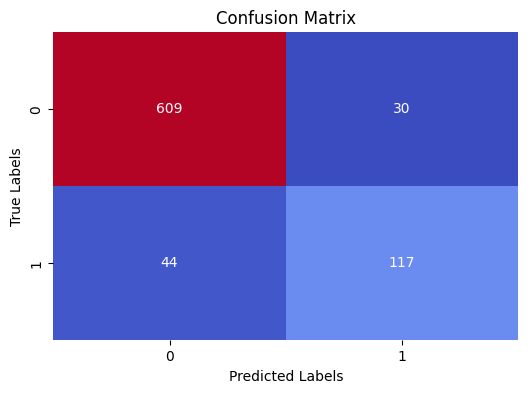

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtain the predicted labels for the train set
predicted = vc2.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, predicted)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_train, predicted)

# Calculate precision
precision = precision_score(y_train, predicted)

# Calculate recall
recall = recall_score(y_train, predicted)

# Calculate F1 score
f1 = f1_score(y_train, predicted)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.907
Precision: 0.796
Recall: 0.727
F1 Score: 0.760


PREPROCESSING THE TEST DATA

In [77]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [78]:
## Finding the numerical and categorical columns
cat_cols_test = [feature for feature in test.columns if test[feature].dtypes == 'O']
num_cols_test = [feature for feature in test.columns if feature not in cat_cols_test]

In [79]:
print(f"Numerical columns: {num_cols_test}\n")
print(f"Categorical columns: {cat_cols_test}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [80]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['m' 'f']


ethnicity:
Number of unique values in the ethnicity: 11
Unique values: ['White-European' 'Asian' '?' 'Middle Eastern ' 'South Asian' 'Pasifika'
 'Turkish' 'Latino' 'Black' 'Others' 'Hispanic']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['yes' 'no']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 35
Unique values: ['India' 'Mexico' 'Egypt' 'Italy' 'Australia' 'United States' 'Jordan'
 'Burundi' 'United Kingdom' 'Canada' 'Germany' 'Russia' 'Spain' 'Austria'
 'Iran' 'New Zealand' 'Bolivia' 'United Arab Emirates' 'Uruguay' 'Lebanon'
 'France' 'Netherlands' 'Bahamas' 'Iceland' 'Sri Lanka' 'Afghanistan'
 'Pakistan' 'Malaysia' 'Aruba' 'Ireland' 'Viet Nam' 'Tonga' 'Philippines'
 'Azerbaijan' 'Czech Republic']


used_app_before:
Number of unique values in the used_app_before: 2
Unique values: ['no' 'y

In [81]:
## Some of the columns present in the dataset have a ? instead of a record
## Columns -- ethnicity and relation
test['ethnicity'] = np.where(test['ethnicity'] == '?', 'Others', test['ethnicity'])
test['relation'] = np.where(test['relation'] == '?', 'Others', test['relation'])

In [82]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['m' 'f']


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['White-European' 'Asian' 'Others' 'Middle Eastern ' 'South Asian'
 'Pasifika' 'Turkish' 'Latino' 'Black' 'Hispanic']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['yes' 'no']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 35
Unique values: ['India' 'Mexico' 'Egypt' 'Italy' 'Australia' 'United States' 'Jordan'
 'Burundi' 'United Kingdom' 'Canada' 'Germany' 'Russia' 'Spain' 'Austria'
 'Iran' 'New Zealand' 'Bolivia' 'United Arab Emirates' 'Uruguay' 'Lebanon'
 'France' 'Netherlands' 'Bahamas' 'Iceland' 'Sri Lanka' 'Afghanistan'
 'Pakistan' 'Malaysia' 'Aruba' 'Ireland' 'Viet Nam' 'Tonga' 'Philippines'
 'Azerbaijan' 'Czech Republic']


used_app_before:
Number of unique values in the used_app_before: 2
Unique values: ['no' 'yes']

In [83]:
## Checking for the missing values in the dataset
test.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

NO Missing data in the test data

In [84]:
## Removing useless columns from the dataset
## Removing ID column since it doesn't contribute to the prediction of the autism as we can tell by our logic
## Removing the age_desc columns since the column has only one value. In other words, the column has zero variance
test.drop(['ID','age_desc'],axis=1,inplace=True)

In [85]:
num_cols_test.remove('ID')

cat_cols_test.remove('age_desc')

print(f"Numerical columns: {num_cols_test}\n")
print(f"Categorical columns: {cat_cols_test}")

Numerical columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [86]:
## Encoding the categorical columns
test[cat_cols_test] = oe.transform(test[cat_cols_test])

In [87]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: [1 0]


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: [9 0 5 4 7 6 8 3 1 2]


jaundice:
Number of unique values in the jaundice: 2
Unique values: [1 0]


austim:
Number of unique values in the austim: 2
Unique values: [0 1]


contry_of_res:
Number of unique values in the contry_of_res: 33
Unique values: [25 34 19 29  6 54 31 14 53 15 22 42 47  7 26 36 12 52 60 21 35  9 24 48
  0 40 33  5 28 55 50  8 18]


used_app_before:
Number of unique values in the used_app_before: 2
Unique values: [0 1]


relation:
Number of unique values in the relation: 5
Unique values: [4 2 1 3 0]




In [88]:

test.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation'],
      dtype='object')

In [89]:
test.head

<bound method NDFrame.head of      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         0         0         1         1         0   
1           1         0         0         0         0         0         0   
2           1         1         1         0         1         1         0   
3           0         0         0         0         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
195         1         1         0         0         1         0         0   
196         1         0         0         0         0         0         0   
197         1         0         0         0         0         0         1   
198         0         1         0         0         0         0         0   
199         1         0         0         0         0         0         1   

     A8_Score  A9_Score  A10_Score        age  gender  ethnicity  jaundice  \
0           0         1          1  15.599481       1          9         1   
1           1         0          0  27.181099       1          0         0   
2           1         1          1  31.643906       1          9         1   
3           0         0          0  25.369210       1          5         0   
4           0         0          0   9.078580       1          5         0   
..        ...       ...        ...        ...     ...        ...       ...   
195         1         1          1  23.099434       1          1         0   
196         0         0          1  13.935726       1          5         0   
197         0         1          1  22.760041       1          5         0   
198         1         0          1  24.352584       0          5         0   
199         1         0          1  45.713232       0          5         0   

     austim  contry_of_res  used_app_before     result  relation  
0         0             25                0  12.399055         4  
1         0             34                0   6.551598         4  
2         0             19                0   3.180663         4  
3         0             25                0   2.220766         4  
4         0             29                0   7.252028         4  
..      ...            ...              ...        ...       ...  
195       0              8                0  -1.915659         4  
196       0             25                0   0.520234         4  
197       0             36                0   3.498948         1  
198       0             54                0   5.594550         4  
199       0             18                0   9.532981         4  

[200 rows x 19 columns]>

Making predictions for the test data using the trained voting classifier number 2

In [90]:
final_predictions = vc2.predict(test)
final_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [91]:

len(final_predictions)

200